# Wave Orbital Velocities

In [1]:
import sys
import os
import os.path as op

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import panel as pn
pn.extension()

sys.path.insert(0, os.path.join(os.getcwd()  , '..', '..', '..'))

from sympy import *
from lib.velocities import *


In [2]:
A, g, w, k, h, x, z, t = symbols('A g w k h x z t')


**Potential Equation**

$\Phi(x,z,t)$

In [3]:
Pot = -(A * g / w) * (cosh(k * (h + z)) / cosh(k * h)) * sin(k * x - w * t)
Pot

-A*g*sin(k*x - t*w)*cosh(k*(h + z))/(w*cosh(h*k))

**Sea Surface**

In [4]:
Eta = 1 / g * diff(Pot, t).evalf(subs={'z':0})
Eta

A*cos(k*x - t*w)

**Velocities of a Progressive Wave Train**

In [5]:
u = -diff(Pot, x)
u

A*g*k*cos(k*x - t*w)*cosh(k*(h + z))/(w*cosh(h*k))

In [6]:
w = -diff(Pot, z)
w

A*g*k*sin(k*x - t*w)*sinh(k*(h + z))/(w*cosh(h*k))

**Acelerations of a Progressive Wave Train**

In [7]:
ax = -diff(u, t)
ax

-A*g*k*sin(k*x - t*w)*cosh(k*(h + z))/cosh(h*k)

In [8]:
az = -diff(w, t)
az

A*g*k*cos(k*x - t*w)*sinh(k*(h + z))/cosh(h*k)

## Dispersion Equation

In [9]:
kw = dict(H = (0, 10, 0.5, 1), T = (4, 30, 1, 4), h = (4, 30, 1, 10), t = (0, 100, 1, 20))
i = pn.interact(plotWave, **kw)
plt.close()

Column
    [0] Row
        [0] FloatSlider(end=10, name='H', step=0.5, value=1.0)
        [1] IntSlider(end=30, name='T', start=4, value=4)
        [2] IntSlider(end=30, name='h', start=4, value=10)
    [1] Row
        [0] IntSlider(end=100, name='t', value=20)
    [2] Row
        [0] Row
            [0] Matplotlib(Figure, name='interactive00101')
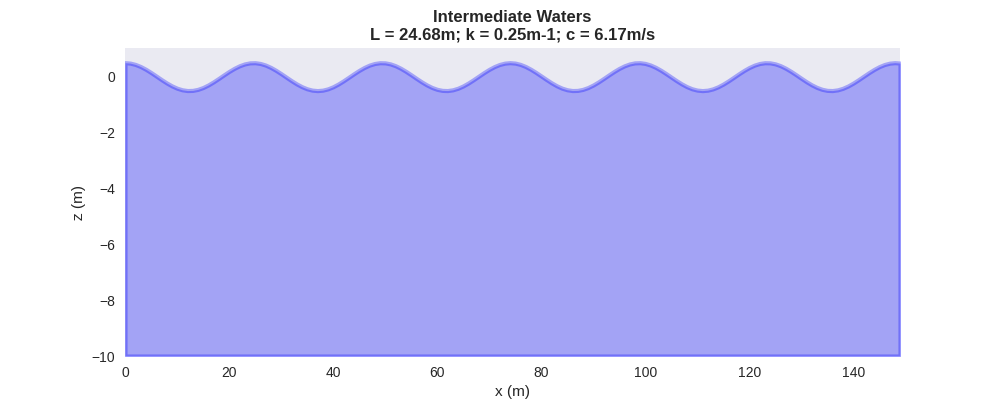

In [10]:
panel = pn.Column(pn.Row(i[0][0], i[0][1], i[0][2]), pn.Row(i[0][3]), pn.Row(i[1]))
panel

## Velocity Field of a progressive wave train

In [11]:
i = pn.interact(plotVelocity, **kw)
plt.close()

Column
    [0] Row
        [0] FloatSlider(end=10, name='H', step=0.5, value=1.0)
        [1] IntSlider(end=30, name='T', start=4, value=4)
        [2] IntSlider(end=30, name='h', start=4, value=10)
    [1] Row
        [0] IntSlider(end=100, name='t', value=20)
    [2] Row
        [0] Row
            [0] Matplotlib(Figure, name='interactive00118')
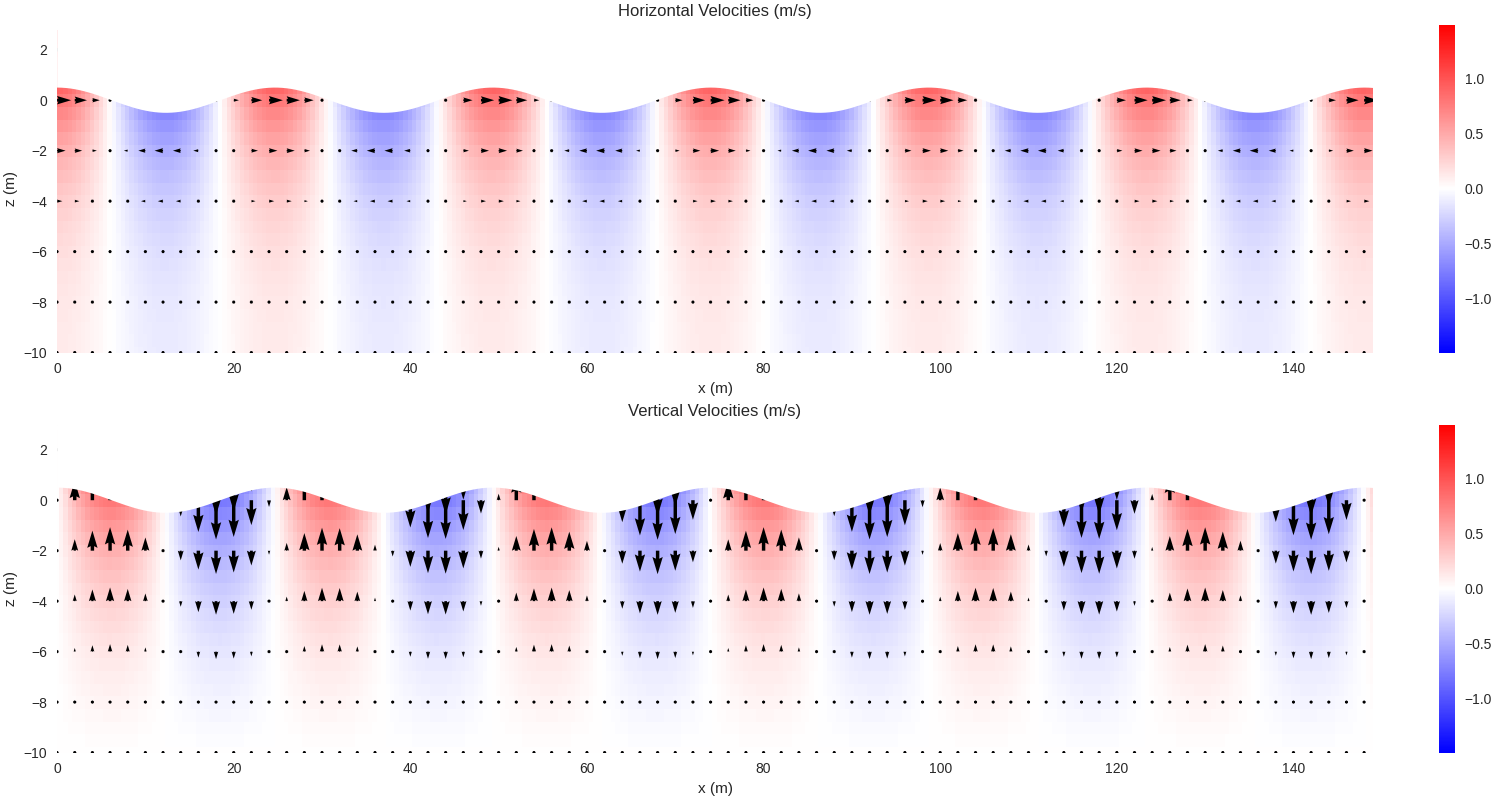

In [12]:
panel = pn.Column(pn.Row(i[0][0], i[0][1], i[0][2]), pn.Row(i[0][3]), pn.Row(i[1]))
panel

## Wave Orbital Trayectories

In [13]:
kw = dict(H = (0.5, 10, 0.5, 2.5), T = (4, 30, 1, 5), h = (1, 30, 1, 4), t = (0, 50, 0.5, 0))
i = pn.interact(plot_elipses, **kw)
plt.close()

Column
    [0] Row
        [0] FloatSlider(end=10, name='H', start=0.5, step=0.5, value=2.5)
        [1] IntSlider(end=30, name='T', start=4, value=5)
        [2] IntSlider(end=30, name='h', start=1, value=4)
    [1] Row
        [0] FloatSlider(end=50, name='t', step=0.5)
    [2] Row
        [0] Row
            [0] Matplotlib(Figure, name='interactive00134')
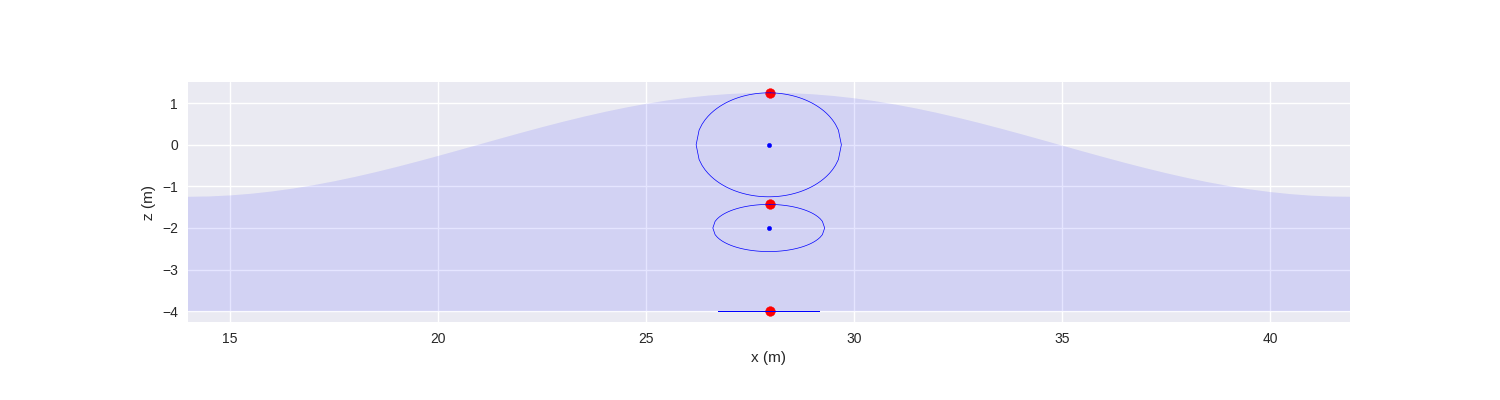

In [14]:
panel = pn.Column(pn.Row(i[0][0], i[0][1], i[0][2]), pn.Row(i[0][3]), pn.Row(i[1]))
panel